In [135]:
import os
import sys
sys.path.append("/home/niyiyu/Research/MachineLearning/seisbench/")
sys.path.append("/home/niyiyu/Research/pnwstore/")
from pnwstore.mseed import WaveformClient
import seisbench.models as sbm
import pickle
import glob
from obspy.core.utcdatetime import UTCDateTime

import seisbench
import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

In [41]:
client = WaveformClient()

In [201]:
model = sbm.EQTransformer.from_pretrained("original")
# model = sbm.EQTransformer.from_pretrained("stead")
# model = sbm.EQTransformer.from_pretrained("pnw")
model.to(torch.device("cuda"))
print(model.device)

cuda:0


## read redpy catalog
download here: http://assets.pnsn.org/red/

In [97]:
# the catalog from Mt. St. Helens
!wget http://assets.pnsn.org/red/msh/catalog.txt

--2022-07-15 01:23:46--  http://assets.pnsn.org/red/msh/catalog.txt
Resolving assets.pnsn.org (assets.pnsn.org)... 128.95.16.16
Connecting to assets.pnsn.org (assets.pnsn.org)|128.95.16.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242947 (237K) [text/plain]
Saving to: ‘catalog.txt.1’

catalog.txt.1       100%[===================>] 237.25K  --.-KB/s    in 0.003s  

2022-07-15 01:23:46 (81.6 MB/s) - ‘catalog.txt.1’ saved [242947/242947]



In [127]:
df = pd.read_csv("./catalog.txt", delimiter=' ', header = None, names = ['a', 'b'])
df['year'] = df.apply(lambda row: int(row.b.split('-')[0]), axis = 1)
df

,a,b,year
0,0,2009-02-26T20:38:42.920000,2009
1,0,2009-02-27T23:07:27.440000,2009
2,0,2010-03-01T19:14:48.650000,2010
3,0,2010-03-01T19:15:00.900000,2010
4,1,2009-03-02T03:59:27.520000,2009
...,...,...,...
7869,964,2022-07-14T08:00:49.150000,2022
7870,965,2022-07-12T19:28:05.680000,2022
7871,965,2022-07-12T19:28:09.270000,2022
7872,966,2022-07-13T23:48:21.760000,2022


## manually specify net.sta.cha

In [ ]:
station = "B204"
network = "PB"
print(glob.glob(f"/data/whd01/yiyu_data/PNWML/filtered_by_multisensor/{network}/{station}/*/*.cat"))

In [191]:
channel = "EH"
y = 0
for idx, i in tqdm(df.iterrows(), total = len(df)):
    t = UTCDateTime(i[1])
    if  t.year >= 2021 or t.year < 2007:
        pass
    else:
        print("------------------------------------------------")
        print("|RED time:\t\t       ", i[1])
        if len(glob.glob(f"/data/whd01/yiyu_data/PNWML/catalog/{network}/{station}/{t.year}/{str(t.julday).zfill(3)}-*.cat")):
            with open(f"/data/whd01/yiyu_data/PNWML/catalog/{network}/{station}/{t.year}/{str(t.julday).zfill(3)}-{channel}.cat", 'rb') as f:
                picks = pickle.load(f)['picks']
            for p in picks:
                if 0 < p.peak_time.timestamp - t.timestamp < 20:
                    y += 1
                    print("|Found EqT pick:      ", p)
                    break
print(y/len(df[df['year']<=2020]))
                    

  4%|▎         | 290/7874 [00:00<00:05, 1450.79it/s]

------------------------------------------------
|RED time:		        2009-02-26T20:38:42.920000
------------------------------------------------
|RED time:		        2009-02-27T23:07:27.440000
------------------------------------------------
|RED time:		        2010-03-01T19:14:48.650000
|Found EqT pick:       PB.B204.	2010-03-01T19:14:49.718400Z	P
------------------------------------------------
|RED time:		        2010-03-01T19:15:00.900000
------------------------------------------------
|RED time:		        2009-03-02T03:59:27.520000
|Found EqT pick:       PB.B204.	2009-03-02T03:59:29.558400Z	S
------------------------------------------------
|RED time:		        2009-03-04T06:12:04.710000
|Found EqT pick:       PB.B204.	2009-03-04T06:12:05.558400Z	P
------------------------------------------------
|RED time:		        2009-03-15T05:01:36.498600
------------------------------------------------
|RED time:		        2009-03-15T07:31:27.139500
----------------------------------------------

  6%|▌         | 445/7874 [00:00<00:04, 1492.43it/s]

|Found EqT pick:       PB.B204.	2010-01-27T04:03:59.918400Z	P
------------------------------------------------
|RED time:		        2010-01-28T04:08:27.569900
------------------------------------------------
|RED time:		        2010-02-27T17:35:41.160100
------------------------------------------------
|RED time:		        2010-03-02T07:18:07.530500
------------------------------------------------
|RED time:		        2010-03-22T03:48:08.871000
------------------------------------------------
|RED time:		        2010-03-22T08:13:05.970900
------------------------------------------------
|RED time:		        2010-04-08T05:25:25.450000
------------------------------------------------
|RED time:		        2010-04-08T15:40:25.610500
------------------------------------------------
|RED time:		        2010-04-21T20:37:26.883500
------------------------------------------------
|RED time:		        2010-05-06T15:56:08.450000
------------------------------------------------
|RED time:		        2010-

  9%|▉         | 734/7874 [00:00<00:05, 1378.24it/s]

------------------------------------------------
|RED time:		        2011-02-18T08:08:09.220000
|Found EqT pick:       PB.B204.	2011-02-18T08:08:10.658400Z	P
------------------------------------------------
|RED time:		        2011-02-18T16:02:47.390000
|Found EqT pick:       PB.B204.	2011-02-18T16:02:51.038400Z	S
------------------------------------------------
|RED time:		        2011-02-19T17:10:25.020000
------------------------------------------------
|RED time:		        2011-02-20T05:01:52.910200
|Found EqT pick:       PB.B204.	2011-02-20T05:01:56.568400Z	S
------------------------------------------------
|RED time:		        2011-02-21T02:21:37.730000
------------------------------------------------
|RED time:		        2011-02-21T03:27:35.580000
------------------------------------------------
|RED time:		        2011-02-21T15:24:33.999900
|Found EqT pick:       PB.B204.	2011-02-21T15:24:35.448400Z	P
------------------------------------------------
|RED time:		        2011-02-22T

 13%|█▎        | 1018/7874 [00:00<00:05, 1341.24it/s]

|Found EqT pick:       PB.B204.	2012-05-13T23:23:50.168400Z	P
------------------------------------------------
|RED time:		        2012-07-04T04:00:47.471100
------------------------------------------------
|RED time:		        2012-07-05T11:22:32.811000
------------------------------------------------
|RED time:		        2012-07-04T18:12:09.300000
|Found EqT pick:       PB.B204.	2012-07-04T18:12:09.988400Z	P
------------------------------------------------
|RED time:		        2012-07-04T18:13:24.720000
|Found EqT pick:       PB.B204.	2012-07-04T18:13:25.488400Z	P
------------------------------------------------
|RED time:		        2012-07-04T18:16:19.640000
|Found EqT pick:       PB.B204.	2012-07-04T18:16:20.358400Z	P
------------------------------------------------
|RED time:		        2012-07-07T08:53:55.290000
|Found EqT pick:       PB.B204.	2012-07-07T08:53:56.858400Z	P
------------------------------------------------
|RED time:		        2012-07-08T01:30:49.440000
|Found EqT pick:  

 17%|█▋        | 1302/7874 [00:00<00:04, 1382.52it/s]

------------------------------------------------
|RED time:		        2013-11-05T04:04:34.590000
------------------------------------------------
|RED time:		        2013-11-05T04:26:38.980000
------------------------------------------------
|RED time:		        2013-11-27T19:08:59.520000
------------------------------------------------
|RED time:		        2013-11-28T10:37:13.420000
------------------------------------------------
|RED time:		        2013-11-29T10:14:59.300000
------------------------------------------------
|RED time:		        2013-11-29T21:37:34.400000
------------------------------------------------
|RED time:		        2013-12-03T00:38:07.770000
------------------------------------------------
|RED time:		        2013-12-04T13:24:15.100000
------------------------------------------------
|RED time:		        2013-12-04T20:33:14.680000
------------------------------------------------
|RED time:		        2013-11-28T10:36:39.780000
----------------------------------------

 20%|██        | 1591/7874 [00:01<00:04, 1407.45it/s]

------------------------------------------------
|RED time:		        2014-02-10T01:47:04.430000
------------------------------------------------
|RED time:		        2014-02-10T10:45:08.820000
------------------------------------------------
|RED time:		        2014-02-10T11:23:55.840000
------------------------------------------------
|RED time:		        2014-02-12T00:01:59.890000
------------------------------------------------
|RED time:		        2014-02-12T01:02:28.690000
------------------------------------------------
|RED time:		        2014-02-18T04:25:23.520000
------------------------------------------------
|RED time:		        2014-04-07T07:29:18.990000
------------------------------------------------
|RED time:		        2014-04-07T21:54:29.570000
------------------------------------------------
|RED time:		        2014-04-19T23:39:05.060000
------------------------------------------------
|RED time:		        2014-04-20T15:14:12.440000
----------------------------------------

 24%|██▍       | 1877/7874 [00:01<00:04, 1393.48it/s]

------------------------------------------------
|RED time:		        2014-08-16T14:28:29.410000
------------------------------------------------
|RED time:		        2014-08-16T14:33:30.870000
------------------------------------------------
|RED time:		        2014-08-16T17:06:12.650000
------------------------------------------------
|RED time:		        2014-08-16T17:27:18.320000
------------------------------------------------
|RED time:		        2014-08-16T19:06:04.100000
------------------------------------------------
|RED time:		        2014-08-16T19:18:32.860000
------------------------------------------------
|RED time:		        2014-08-16T21:04:09.220000
------------------------------------------------
|RED time:		        2014-08-17T12:14:02.980000
------------------------------------------------
|RED time:		        2014-08-17T13:27:10.840000
------------------------------------------------
|RED time:		        2014-08-17T13:43:53.140000
----------------------------------------

 28%|██▊       | 2172/7874 [00:01<00:03, 1434.62it/s]

------------------------------------------------
|RED time:		        2016-06-06T07:38:39.850000
------------------------------------------------
|RED time:		        2016-06-06T08:05:45.440000
------------------------------------------------
|RED time:		        2016-06-06T08:27:25.880000
------------------------------------------------
|RED time:		        2016-06-06T09:04:24.410000
------------------------------------------------
|RED time:		        2016-06-06T10:00:38.910000
------------------------------------------------
|RED time:		        2016-06-08T04:59:19.760000
------------------------------------------------
|RED time:		        2016-06-08T12:37:02.290000
------------------------------------------------
|RED time:		        2016-06-09T02:56:13.610000
------------------------------------------------
|RED time:		        2016-06-09T03:09:22.650000
------------------------------------------------
|RED time:		        2016-06-09T04:40:39
-----------------------------------------------

 32%|███▏      | 2494/7874 [00:01<00:03, 1523.93it/s]

------------------------------------------------
|RED time:		        2017-09-29T18:58:44.820000
------------------------------------------------
|RED time:		        2017-09-29T21:58:39.120000
------------------------------------------------
|RED time:		        2017-09-30T02:35:43.420000
------------------------------------------------
|RED time:		        2017-09-30T03:10:09.570000
------------------------------------------------
|RED time:		        2017-09-30T03:58:46.980000
------------------------------------------------
|RED time:		        2017-09-30T05:05:50.590000
------------------------------------------------
|RED time:		        2017-09-30T10:23:29.660000
------------------------------------------------
|RED time:		        2017-09-30T10:38:34.500000
------------------------------------------------
|RED time:		        2017-09-30T12:13:35.760000
------------------------------------------------
|RED time:		        2017-09-30T12:58:26.250000
----------------------------------------

 36%|███▌      | 2801/7874 [00:01<00:03, 1526.37it/s]

------------------------------------------------
|RED time:		        2018-07-26T23:23:38.070000
------------------------------------------------
|RED time:		        2018-07-27T01:47:04.710000
------------------------------------------------
|RED time:		        2018-07-27T03:34:22.470000
------------------------------------------------
|RED time:		        2018-07-27T04:01:26.020000
------------------------------------------------
|RED time:		        2018-07-27T04:14:15.540000
------------------------------------------------
|RED time:		        2018-07-27T04:22:25.770000
------------------------------------------------
|RED time:		        2018-07-27T04:34:57.310000
------------------------------------------------
|RED time:		        2018-07-27T04:42:40.050000
------------------------------------------------
|RED time:		        2018-07-27T05:20:01.960000
------------------------------------------------
|RED time:		        2018-07-27T05:21:39.940000
----------------------------------------

 40%|███▉      | 3126/7874 [00:02<00:03, 1576.77it/s]

------------------------------------------------
|RED time:		        2017-12-08T09:16:02.340000
------------------------------------------------
|RED time:		        2017-12-08T11:46:20.610000
------------------------------------------------
|RED time:		        2017-12-08T11:58:42.180000
------------------------------------------------
|RED time:		        2017-12-08T12:28:29.140000
------------------------------------------------
|RED time:		        2017-12-08T12:45:46.430000
------------------------------------------------
|RED time:		        2017-12-08T13:19:14.950000
------------------------------------------------
|RED time:		        2017-12-08T13:38:34.600000
------------------------------------------------
|RED time:		        2017-12-08T15:39:46.240000
------------------------------------------------
|RED time:		        2017-12-08T16:11:44.370000
------------------------------------------------
|RED time:		        2017-12-08T17:04:13.820000
----------------------------------------

 44%|████▍     | 3456/7874 [00:02<00:02, 1602.41it/s]

------------------------------------------------
|RED time:		        2015-03-09T23:18:30.240000
------------------------------------------------
|RED time:		        2015-03-10T00:44:51.100000
------------------------------------------------
|RED time:		        2015-03-10T01:38:57.710000
------------------------------------------------
|RED time:		        2015-03-10T02:13:13.940000
------------------------------------------------
|RED time:		        2015-03-10T02:36:49.320000
------------------------------------------------
|RED time:		        2015-03-10T03:00:20.140000
------------------------------------------------
|RED time:		        2015-03-10T03:17:06.770000
------------------------------------------------
|RED time:		        2015-03-10T03:53:35.650000
------------------------------------------------
|RED time:		        2015-03-10T04:11:48.830000
------------------------------------------------
|RED time:		        2015-03-10T04:56:45.100000
----------------------------------------

 48%|████▊     | 3795/7874 [00:02<00:02, 1630.10it/s]

------------------------------------------------
|RED time:		        2016-08-11T04:47:05.780000
------------------------------------------------
|RED time:		        2016-08-11T10:19:47.800000
------------------------------------------------
|RED time:		        2016-08-12T06:27:19.410000
------------------------------------------------
|RED time:		        2016-08-12T10:51:28.670000
------------------------------------------------
|RED time:		        2016-08-12T15:41:23.490000
------------------------------------------------
|RED time:		        2016-08-13T01:38:59.820000
------------------------------------------------
|RED time:		        2016-08-13T08:49:07.920000
------------------------------------------------
|RED time:		        2016-08-13T23:12:58.740000
------------------------------------------------
|RED time:		        2016-08-14T03:11:06.940000
------------------------------------------------
|RED time:		        2016-08-15T05:04:06.980000
----------------------------------------

 52%|█████▏    | 4129/7874 [00:02<00:02, 1609.24it/s]

------------------------------------------------
|RED time:		        2018-09-05T00:50:25.440000
------------------------------------------------
|RED time:		        2018-09-05T01:05:43.540000
------------------------------------------------
|RED time:		        2018-09-05T01:40:51.930000
------------------------------------------------
|RED time:		        2018-09-05T02:34:58.790000
------------------------------------------------
|RED time:		        2018-09-05T03:14:10.060000
------------------------------------------------
|RED time:		        2018-09-06T02:51:25.340000
------------------------------------------------
|RED time:		        2018-09-06T03:02:55.680000
------------------------------------------------
|RED time:		        2018-09-06T04:16:25.790000
------------------------------------------------
|RED time:		        2018-09-06T04:44:15.480000
------------------------------------------------
|RED time:		        2018-09-06T04:51:38.070000
----------------------------------------

 56%|█████▋    | 4448/7874 [00:02<00:02, 1540.92it/s]

------------------------------------------------
|RED time:		        2018-08-22T09:42:23.820000
------------------------------------------------
|RED time:		        2018-08-22T09:44:39.500000
------------------------------------------------
|RED time:		        2018-08-22T11:11:29.680000
------------------------------------------------
|RED time:		        2018-08-22T11:36:12.390000
------------------------------------------------
|RED time:		        2018-08-22T12:11:11.890000
|Found EqT pick:       PB.B204.	2018-08-22T12:11:11.908400Z	S
------------------------------------------------
|RED time:		        2018-08-22T12:18:20.150000
------------------------------------------------
|RED time:		        2018-08-22T12:29:32.480000
------------------------------------------------
|RED time:		        2018-08-22T15:40:58.570000
------------------------------------------------
|RED time:		        2018-08-22T18:54:32
------------------------------------------------
|RED time:		        2018-08-23T0

 61%|██████    | 4822/7874 [00:03<00:01, 1652.78it/s]

------------------------------------------------
|RED time:		        2017-04-29T04:33:40.590000
------------------------------------------------
|RED time:		        2017-04-29T05:22:39.780000
------------------------------------------------
|RED time:		        2017-04-29T05:55:19.230000
------------------------------------------------
|RED time:		        2017-04-29T06:04:43.690000
------------------------------------------------
|RED time:		        2017-04-29T06:28:53.680000
------------------------------------------------
|RED time:		        2017-04-29T06:31:13.840000
------------------------------------------------
|RED time:		        2017-04-29T06:34:50.310000
------------------------------------------------
|RED time:		        2017-04-29T06:35:43.340000
------------------------------------------------
|RED time:		        2017-04-29T06:46:21.700000
------------------------------------------------
|RED time:		        2017-04-29T07:26:32.380000
----------------------------------------

 65%|██████▌   | 5150/7874 [00:03<00:01, 1593.15it/s]

|Found EqT pick:       PB.B204.	2016-07-04T11:47:05.948400Z	S
------------------------------------------------
|RED time:		        2016-07-01T18:36:58.460000
|Found EqT pick:       PB.B204.	2016-07-01T18:36:59.868400Z	P
------------------------------------------------
|RED time:		        2016-07-01T20:19:00.120000
|Found EqT pick:       PB.B204.	2016-07-01T20:19:01.748400Z	P
------------------------------------------------
|RED time:		        2016-07-01T18:37:24.270000
------------------------------------------------
|RED time:		        2016-07-01T20:19:25.920000
------------------------------------------------
|RED time:		        2016-07-01T20:33:53.920000
------------------------------------------------
|RED time:		        2016-07-01T21:18:58.600000
------------------------------------------------
|RED time:		        2016-07-03T13:48:50.090000
------------------------------------------------
|RED time:		        2016-07-05T14:25:53.890000
----------------------------------------------

 68%|██████▊   | 5356/7874 [00:03<00:01, 1724.17it/s]

------------------------------------------------
|RED time:		        2017-04-24T14:41:46.300000
------------------------------------------------
|RED time:		        2017-04-24T15:07:39.630000
------------------------------------------------
|RED time:		        2017-04-24T16:56:07.220000
------------------------------------------------
|RED time:		        2017-04-24T17:33:22.390000
------------------------------------------------
|RED time:		        2017-04-24T19:15:03.210000
------------------------------------------------
|RED time:		        2017-04-24T20:40:35.520000
------------------------------------------------
|RED time:		        2017-04-24T22:13:11.420000
------------------------------------------------
|RED time:		        2017-04-25T01:25:27.960000
------------------------------------------------
|RED time:		        2017-04-25T07:07:05.740000
------------------------------------------------
|RED time:		        2017-04-25T09:20:59.440000
----------------------------------------

 74%|███████▎  | 5788/7874 [00:03<00:01, 1883.18it/s]

|Found EqT pick:       PB.B204.	2018-01-03T10:06:42.398400Z	P
------------------------------------------------
|RED time:		        2018-01-03T10:17:02.040000
|Found EqT pick:       PB.B204.	2018-01-03T10:17:02.558400Z	P
------------------------------------------------
|RED time:		        2018-01-03T10:35:10.350000
|Found EqT pick:       PB.B204.	2018-01-03T10:35:13.368400Z	S
------------------------------------------------
|RED time:		        2018-01-03T10:40:24.210000
------------------------------------------------
|RED time:		        2018-01-03T10:59:38.440000
|Found EqT pick:       PB.B204.	2018-01-03T10:59:38.978400Z	P
------------------------------------------------
|RED time:		        2018-01-03T11:22:53.260000
|Found EqT pick:       PB.B204.	2018-01-03T11:22:53.748400Z	P
------------------------------------------------
|RED time:		        2018-01-03T11:43:38.620000
|Found EqT pick:       PB.B204.	2018-01-03T11:43:39.078400Z	P
------------------------------------------------
|RE

 78%|███████▊  | 6165/7874 [00:03<00:00, 1802.29it/s]

------------------------------------------------
|RED time:		        2018-09-13T05:01:50.320000
------------------------------------------------
|RED time:		        2018-09-15T05:37:11.600000
------------------------------------------------
|RED time:		        2018-10-16T06:04:32.150000
------------------------------------------------
|RED time:		        2018-09-12T01:45:17.560000
------------------------------------------------
|RED time:		        2018-09-13T05:42:13.950000
------------------------------------------------
|RED time:		        2018-09-18T09:29:08.800000
------------------------------------------------
|RED time:		        2018-09-14T19:50:58.750000
------------------------------------------------
|RED time:		        2018-09-16T10:20:49.050000
------------------------------------------------
|RED time:		        2018-09-26T10:35:44.160000
------------------------------------------------
|RED time:		        2018-10-18T03:24:23.660000
----------------------------------------

 83%|████████▎ | 6545/7874 [00:04<00:00, 1808.95it/s]

|Found EqT pick:       PB.B204.	2019-06-26T05:55:42.008400Z	P
------------------------------------------------
|RED time:		        2019-06-27T16:37:14.260000
------------------------------------------------
|RED time:		        2019-06-28T15:51:26.590000
|Found EqT pick:       PB.B204.	2019-06-28T15:51:26.648400Z	P
------------------------------------------------
|RED time:		        2019-06-28T21:17:28.230000
------------------------------------------------
|RED time:		        2019-06-28T21:28:40.190000
------------------------------------------------
|RED time:		        2019-06-30T12:57:33.400000
|Found EqT pick:       PB.B204.	2019-06-30T12:57:33.408400Z	P
------------------------------------------------
|RED time:		        2019-06-30T13:10:43.260000
------------------------------------------------
|RED time:		        2019-06-30T15:31:15.290000
|Found EqT pick:       PB.B204.	2019-06-30T15:31:15.358400Z	P
------------------------------------------------
|RED time:		        2019-06-30T

100%|██████████| 7874/7874 [00:04<00:00, 1807.62it/s]

------------------------------------------------
|RED time:		        2020-08-16T19:18:43.850000
------------------------------------------------
|RED time:		        2020-08-16T21:12:09.580000
------------------------------------------------
|RED time:		        2020-08-19T21:54:23.260000
|Found EqT pick:       PB.B204.	2020-08-19T21:54:24.418400Z	P
------------------------------------------------
|RED time:		        2020-08-23T20:02:53.180000
------------------------------------------------
|RED time:		        2020-08-28T12:39:00.450000
|Found EqT pick:       PB.B204.	2020-08-28T12:39:01.678400Z	P
------------------------------------------------
|RED time:		        2020-08-30T12:52:29.100000
|Found EqT pick:       PB.B204.	2020-08-30T12:52:30.348400Z	P
------------------------------------------------
|RED time:		        2020-08-30T14:04:46.920000
|Found EqT pick:       PB.B204.	2020-08-30T14:04:48.168400Z	P
------------------------------------------------
|RED time:		        2020-09-16T

## check waveform

### example that ML didn't find the picks (none of original, stead, or pnw)

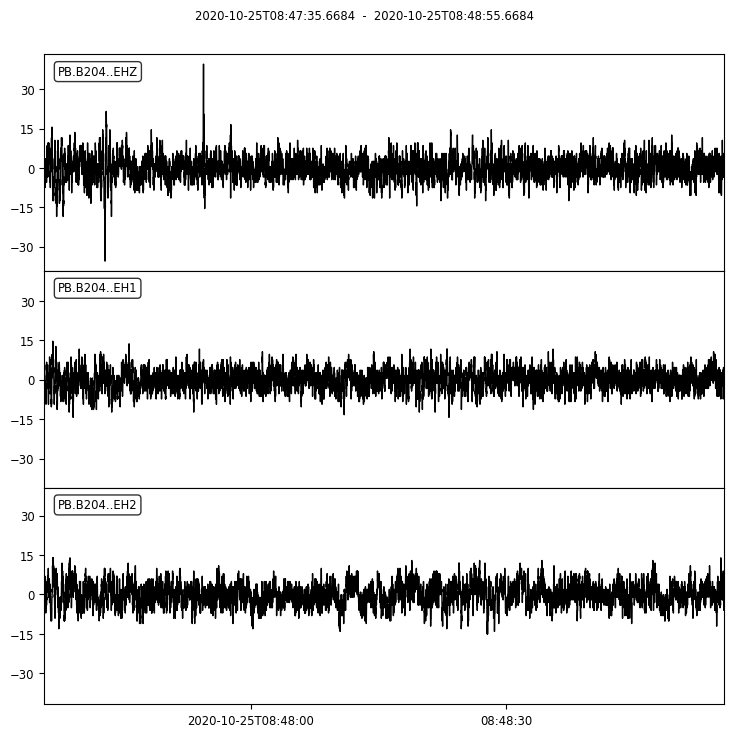

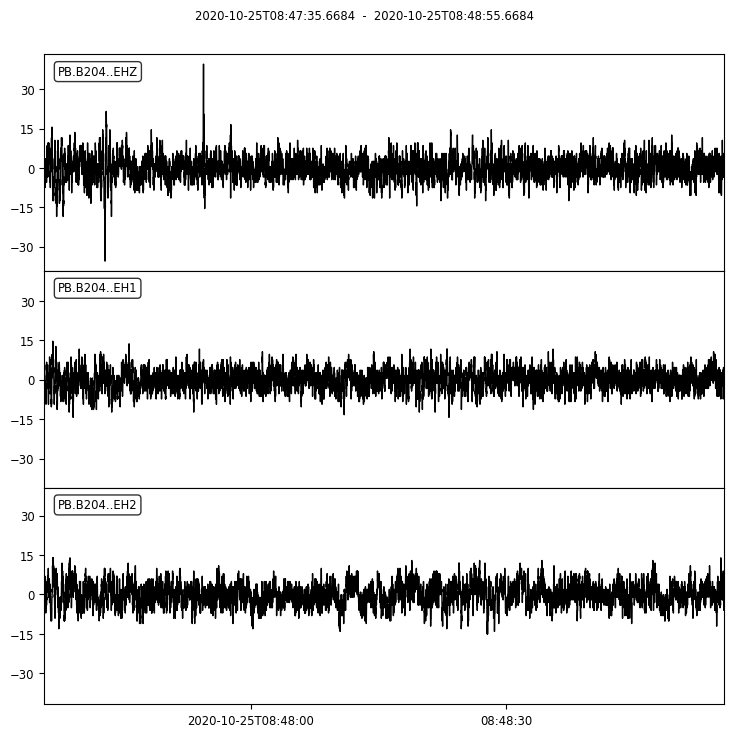

In [202]:
time = UTCDateTime("2020-10-25T08:48:15.670000")
s = client.get_waveforms(network = network, station = station, channel = channel + "?",
                    year = time.year, month = time.month, day = time.day)
s.trim(time - 40, time + 40)
s.detrend('demean')
3s.plot()

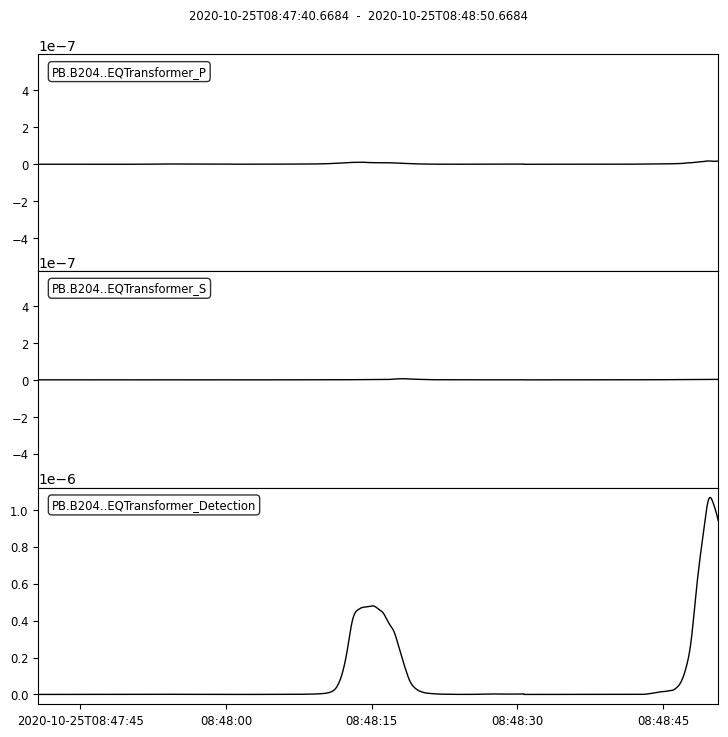

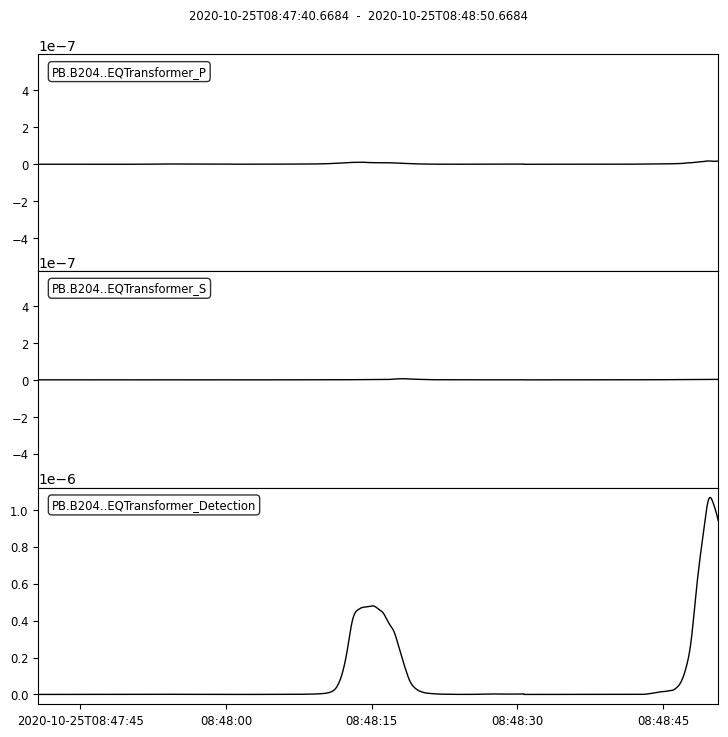

In [204]:
# Eqt original weights does not get the picks
model.annotate(s).plot()

### example that ML found the picks (pnw retrained model)

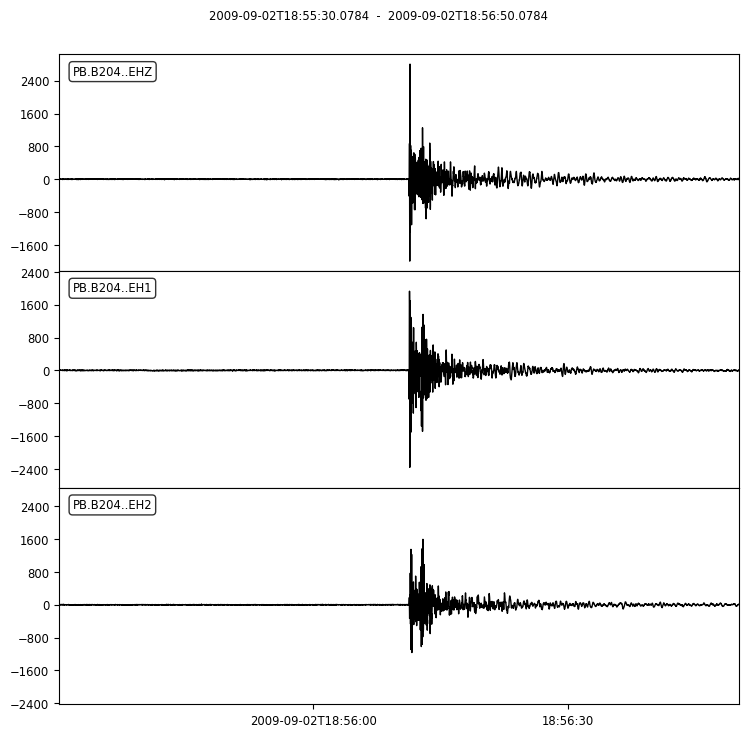

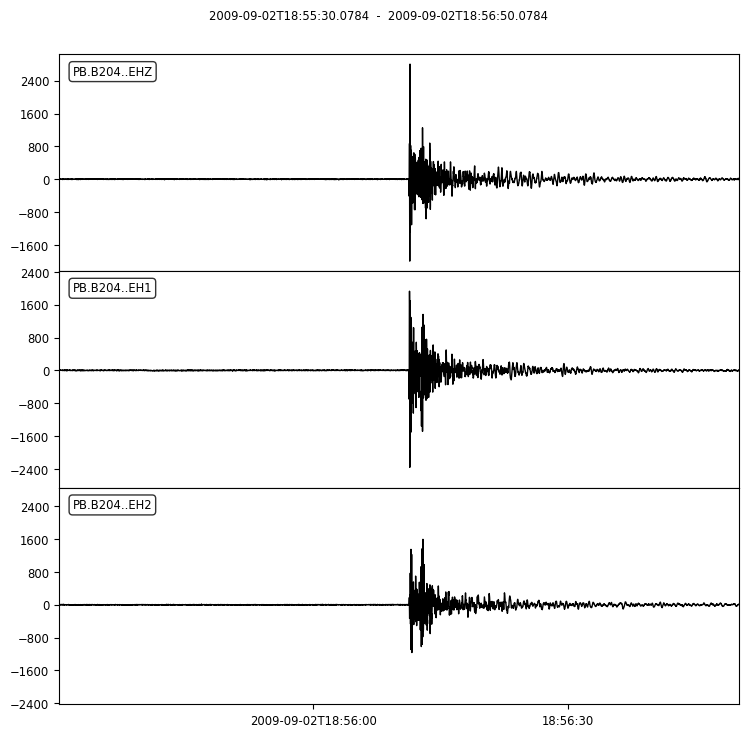

In [173]:
time = UTCDateTime("2009-09-02T18:56:10.079900")
s = client.get_waveforms(network = network, station = station, channel = channel + "?",
                    year = time.year, month = time.month, day = time.day)
s.trim(time - 40, time + 40)
s.detrend('demean')
s.plot()

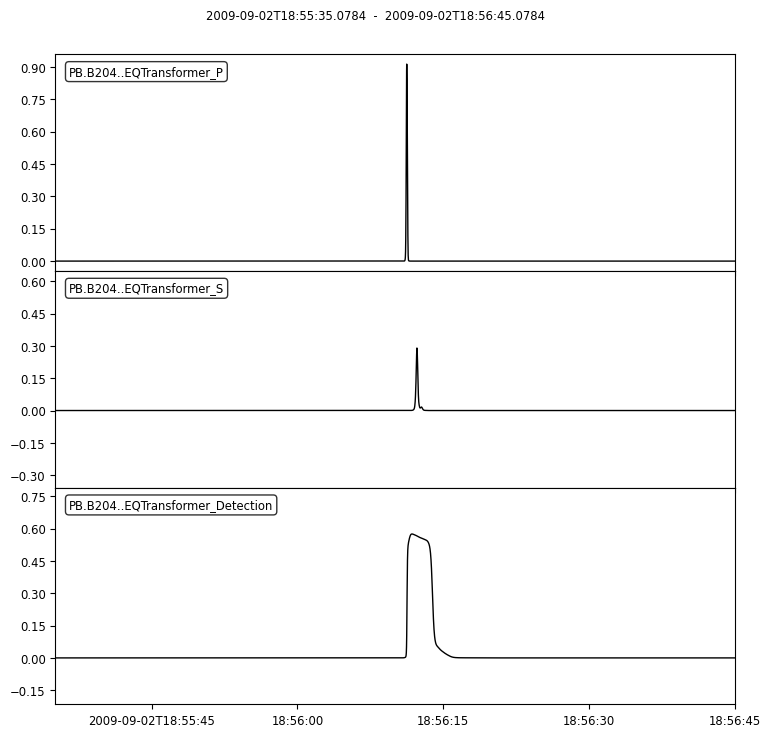

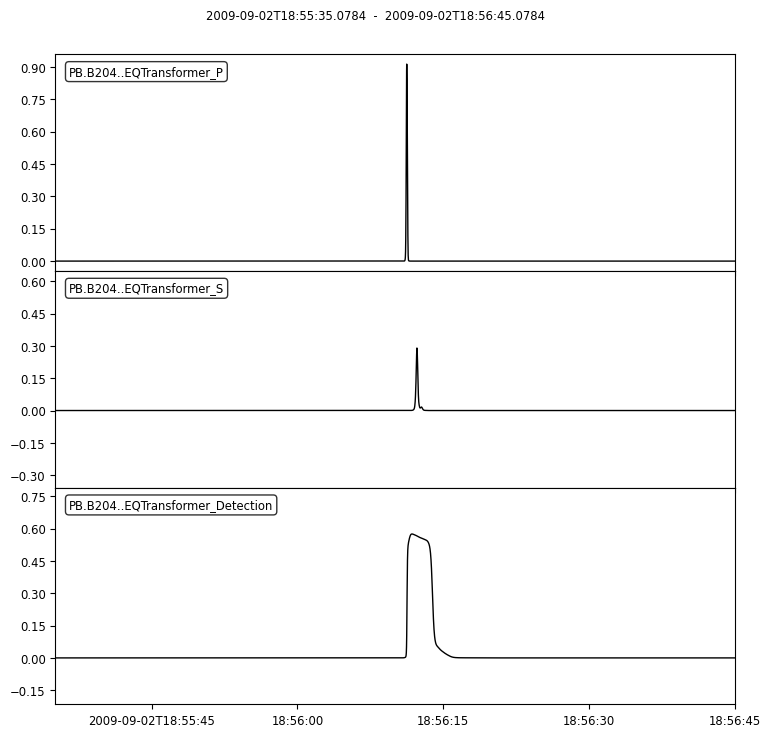

In [174]:
model.annotate(s).plot()